<a href="https://colab.research.google.com/github/Andrija385/chess_computer_vision/blob/main/scripts/CNN_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import cv2 as cv
import os
import matplotlib.pyplot as plt

In [ ]:
class_names = ['white king','white queen','white rook','white bishop','white knight','white pawn',
               'black king','black queen','black rook','black bishop','black knight','black pawn','tile']

In [ ]:
code = {}
code['wk.png']=0
code['wq.png']=1
code['wr.png']=2
code['wb.png']=3
code['wn.png']=4
code['wp.png']=5

code['bk.png']=6
code['bq.png']=7
code['br.png']=8
code['bb.png']=9
code['bn.png']=10
code['bp.png']=11
code['ti.png']=12

code['wk']=0
code['wq']=1
code['wr']=2
code['wb']=3
code['wn']=4
code['wp']=5

code['bk']=6
code['bq']=7
code['br']=8
code['bb']=9
code['bn']=10
code['bp']=11
code['ti']=12
def make_database(path):
    pieces = os.path.join(path,'pieces_png')
    tiles = os.path.join(path,'tiles')
    x = []
    y = []
    for tile_name in os.listdir(tiles):
        print(tile_name)
        tile = cv.imread(os.path.join(tiles,tile_name))
        tile = cv.resize(tile,dsize=(32,32))
        x.append(tile)
        y.append(12)
        for theme in os.listdir(pieces):
            for piece_name in os.listdir(os.path.join(pieces,theme)):
                ime = piece_name[:2].lower()
                label = code[ime]
                piece = cv.imread(os.path.join(pieces,theme,piece_name),cv.IMREAD_UNCHANGED)
                piece_mask = piece[:,:,3].astype(np.uint8)
                piece = piece[:,:,:3]
                piece = cv.resize(piece,dsize=(32,32))
                piece_mask = cv.resize(piece_mask,dsize=(32,32))
                piece_mask_inv = cv.bitwise_not(piece_mask)
                tile_mod = cv.bitwise_and(tile,tile,mask=piece_mask_inv)
                tile_mod = cv.add(tile_mod,piece)
                x.append(tile_mod)
                y.append(label)
    return np.array(x),np.array(y)

In [ ]:
x,y = make_database('/content/drive/MyDrive/final')

black_chesscom_glass.png
white_chesscom_dark_wood.png
white_lichess_newspaper.thumbnail.png
white_chesscom_walnut.png
black_chesscom_bases.png
black_chesscom_green.png
white_chesscom_bases.png
black_chesscom_walnut.png
black_chesscom_marble.png
white_lichess_purple-diag.thumbnail.png
black_lichess_canvas2.thumbnail.jpg
black_lichess_blue3.thumbnail.jpg
white_chesscom_tournament.png
black_lichess_wood4.thumbnail.jpg
black_lichess_grey.thumbnail.jpg
white_lichess_metal.thumbnail.jpg
white_chesscom_bubblegum.png
white_chesscom_parchment.png
white_lichess_maple2.thumbnail.jpg
white_chesscom_neon.png
black_lichess_olive.thumbnail.jpg
black_lichess_horsey.thumbnail.jpg
black_lichess_maple2.thumbnail.jpg
white_lichess_olive.thumbnail.jpg
white_lichess_wood4.thumbnail.jpg
black_chesscom_parchment.png
white_lichess_wood3.thumbnail.jpg
white_lichess_blue-marble.thumbnail.jpg
white_lichess_maple.thumbnail.jpg
white_lichess_horsey.thumbnail.jpg
white_chesscom_dash.png
white_lichess_blue3.thumbnail

In [ ]:
print(x.shape)
print(y.shape)

(14282, 32, 32, 3)
(14282,)


In [ ]:
x=np.array(tf.random.shuffle(x,seed=0))
y=np.array(tf.random.shuffle(y,seed=0))

In [ ]:
x_gray = np.array([cv.cvtColor(img,cv.COLOR_BGR2GRAY) for img in list(x)])

In [ ]:
n = x_gray.shape[0]
n_train = int(0.95*n)
n_test = n-n_train
x_train = x_gray[:n_train]
y_train = y[:n_train]
x_test = x_gray[n_train:]
y_test = y[n_train:]

In [ ]:
def create_model():
  model = tf.keras.models.Sequential([
      tf.keras.layers.Input(shape=(32,32,1)),
      tf.keras.layers.Rescaling(1./255),
      #tf.keras.layers.RandomTranslation(height_factor=0.15,width_factor=0.15,fill_mode='reflect'),
      #tf.keras.layers.RandomRotation(factor=0.1,fill_mode='reflect'),
      tf.keras.layers.Conv2D(32,4,activation='relu'),
      tf.keras.layers.MaxPool2D(),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dropout(0.1),
      tf.keras.layers.Dense(128,activation='relu'),
      tf.keras.layers.Dropout(0.1),
      tf.keras.layers.Dense(13,activation='softmax')
  ])
  model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
  return model

In [ ]:
model = create_model()

In [ ]:
model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
424/424 [==============================] - 27s 62ms/step - loss: 0.3238 - accuracy: 0.9227 - val_loss: 0.0388 - val_accuracy: 0.9958
Epoch 2/10
424/424 [==============================] - 32s 75ms/step - loss: 0.0341 - accuracy: 0.9929 - val_loss: 0.0159 - val_accuracy: 0.9958
Epoch 3/10
424/424 [==============================] - 27s 64ms/step - loss: 0.0188 - accuracy: 0.9951 - val_loss: 0.0117 - val_accuracy: 0.9958
Epoch 4/10
424/424 [==============================] - 15s 36ms/step - loss: 0.0149 - accuracy: 0.9957 - val_loss: 0.0071 - val_accuracy: 0.9986
Epoch 5/10
424/424 [==============================] - 15s 36ms/step - loss: 0.0109 - accuracy: 0.9965 - val_loss: 0.0046 - val_accuracy: 0.9986
Epoch 6/10
424/424 [==============================] - 16s 37ms/step - loss: 0.0117 - accuracy: 0.9952 - val_loss: 0.0045 - val_accuracy: 1.0000
Epoch 7/10
424/424 [==============================] - 15s 36ms/step - loss: 0.0127 - accuracy: 0.9955 - val_loss: 0.0344 - val_accuracy:

In [ ]:
model.evaluate(x_test,y_test)

23/23 [==============================] - 0s 8ms/step - loss: 0.0106 - accuracy: 0.9944


[0.010601679794490337, 0.9944055676460266]

1/1 [==============================] - 0s 20ms/step
white bishop


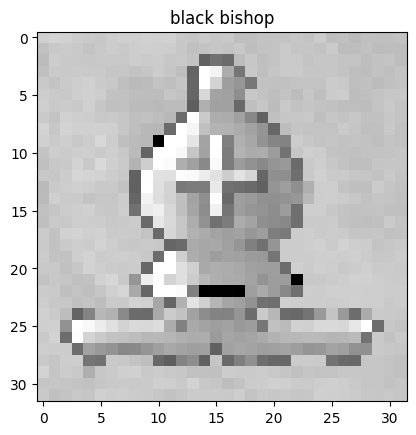

In [ ]:
i=167
plt.imshow(x_test[i],cmap='gray',vmin=0.,vmax=255.,)
plt.title(class_names[y_test[i]])
prediction = model4.predict(x_test[i].reshape((-1,32,32)))
print(class_names[np.argmax(prediction)])

In [ ]:
niz=[]
for i in range(200):
  if y_test[i] != np.argmax(model.predict(x_test[i].reshape((-1,32,32)),verbose=False)):
    niz.append(i)
niz

[]

In [ ]:
model.save('/content/drive/MyDrive/final/models/prvidobar.keras')

In [ ]:
model2 = tf.keras.models.load_model('/content/drive/MyDrive/final/models/prvidobar.keras')

In [ ]:
model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 32, 32, 1)         0         
                                                                 
 conv2d_4 (Conv2D)           (None, 29, 29, 32)        544       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 6272)              0         
                                                                 
 dropout_4 (Dropout)         (None, 6272)              0         
                                                                 
 dense_8 (Dense)             (None, 128)               802944    
                                                      

In [ ]:
model2.evaluate(x_test,y_test)

23/23 [==============================] - 0s 3ms/step - loss: 0.0029 - accuracy: 0.9986


[0.0028668930754065514, 0.9986013770103455]

In [ ]:
def create_model2():
  model = tf.keras.models.Sequential([
      tf.keras.layers.Input(shape=(32,32,1)),
      tf.keras.layers.Rescaling(1./255),
      tf.keras.layers.RandomRotation(factor=0.05,fill_mode='reflect'),
      tf.keras.layers.RandomTranslation(height_factor=0.1,width_factor=0.1,fill_mode='reflect'),
      tf.keras.layers.RandomContrast(0.1),
      tf.keras.layers.Conv2D(64,3,activation='relu'),
      tf.keras.layers.MaxPool2D(),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dropout(0.1),
      tf.keras.layers.Dense(128,activation='relu'),
      tf.keras.layers.Dropout(0.1),
      tf.keras.layers.Dense(13,activation='softmax')
  ])
  model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
  return model

In [ ]:
model2=create_model2()
model2.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
424/424 [==============================] - 40s 90ms/step - loss: 1.1749 - accuracy: 0.6206 - val_loss: 0.2812 - val_accuracy: 0.9147
Epoch 2/10
424/424 [==============================] - 30s 71ms/step - loss: 0.4527 - accuracy: 0.8569 - val_loss: 0.1766 - val_accuracy: 0.9357
Epoch 3/10
424/424 [==============================] - 31s 72ms/step - loss: 0.2882 - accuracy: 0.9110 - val_loss: 0.1248 - val_accuracy: 0.9538
Epoch 4/10
424/424 [==============================] - 31s 72ms/step - loss: 0.2170 - accuracy: 0.9301 - val_loss: 0.0748 - val_accuracy: 0.9720
Epoch 5/10
424/424 [==============================] - 31s 72ms/step - loss: 0.1809 - accuracy: 0.9415 - val_loss: 0.0959 - val_accuracy: 0.9692
Epoch 6/10
424/424 [==============================] - 31s 72ms/step - loss: 0.1504 - accuracy: 0.9512 - val_loss: 0.0740 - val_accuracy: 0.9748
Epoch 7/10
424/424 [==============================] - 40s 95ms/step - loss: 0.1416 - accuracy: 0.9553 - val_loss: 0.0677 - val_accuracy:

In [ ]:
model2.evaluate(x_test,y_test)

23/23 [==============================] - 1s 30ms/step - loss: 0.0477 - accuracy: 0.9748


[0.047697748988866806, 0.9748252034187317]

In [ ]:
model2.save('/content/drive/MyDrive/final/models/drugidobar.keras')

In [ ]:
def create_model3():
  model = tf.keras.models.Sequential([
      tf.keras.layers.Input(shape=(32,32,1)),
      tf.keras.layers.Rescaling(1./255),
      tf.keras.layers.RandomRotation(factor=0.05,fill_mode='reflect'),
      tf.keras.layers.RandomTranslation(height_factor=0.1,width_factor=0.1,fill_mode='reflect'),
      tf.keras.layers.RandomContrast(0.1),
      tf.keras.layers.Conv2D(64,3,activation='relu'),
      tf.keras.layers.MaxPool2D(),
      tf.keras.layers.Conv2D(32,3,activation='relu'),
      tf.keras.layers.MaxPool2D(),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dropout(0.1),
      tf.keras.layers.Dense(128,activation='relu'),
      tf.keras.layers.Dropout(0.1),
      tf.keras.layers.Dense(13,activation='softmax')
  ])
  model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
  return model

In [ ]:
model3=create_model2()
model3.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
424/424 [==============================] - 32s 72ms/step - loss: 0.9913 - accuracy: 0.6894 - val_loss: 0.1905 - val_accuracy: 0.9413
Epoch 2/10
424/424 [==============================] - 30s 72ms/step - loss: 0.3750 - accuracy: 0.8841 - val_loss: 0.1248 - val_accuracy: 0.9594
Epoch 3/10
424/424 [==============================] - 31s 73ms/step - loss: 0.2384 - accuracy: 0.9250 - val_loss: 0.0897 - val_accuracy: 0.9650
Epoch 4/10
424/424 [==============================] - 30s 72ms/step - loss: 0.1753 - accuracy: 0.9440 - val_loss: 0.0787 - val_accuracy: 0.9748
Epoch 5/10
424/424 [==============================] - 30s 71ms/step - loss: 0.1547 - accuracy: 0.9501 - val_loss: 0.0661 - val_accuracy: 0.9804
Epoch 6/10
424/424 [==============================] - 30s 72ms/step - loss: 0.1237 - accuracy: 0.9585 - val_loss: 0.0619 - val_accuracy: 0.9762
Epoch 7/10
424/424 [==============================] - 29s 69ms/step - loss: 0.1118 - accuracy: 0.9654 - val_loss: 0.0572 - val_accuracy:

In [ ]:
model3.save('/content/drive/MyDrive/final/models/trecidobar.keras')

In [ ]:
def create_model4():
  model = tf.keras.models.Sequential([
      tf.keras.layers.Input(shape=(32,32,1)),
      tf.keras.layers.Rescaling(1./255),
      #tf.keras.layers.RandomRotation(factor=0.05,fill_mode='reflect'),
      tf.keras.layers.RandomTranslation(height_factor=0.1,width_factor=0.1,fill_mode='reflect'),
      #tf.keras.layers.RandomContrast(0.1),
      tf.keras.layers.Conv2D(64,3,activation='relu'),
      tf.keras.layers.MaxPool2D(),
      tf.keras.layers.Conv2D(32,3,activation='relu'),
      tf.keras.layers.MaxPool2D(),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dropout(0.1),
      tf.keras.layers.Dense(128,activation='relu'),
      tf.keras.layers.Dropout(0.1),
      tf.keras.layers.Dense(13,activation='softmax')
  ])
  model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
  return model

In [ ]:
model4 = create_model4()
model4.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)

In [ ]:
niz=[]
for i in range(200):
  if y_test[i] != np.argmax(model4.predict(x_test[i].reshape((-1,32,32)),verbose=False)):
    niz.append(i)
niz

[125, 167]

In [ ]:
model4.save('/content/drive/MyDrive/final/models/sedmidobar.keras')

In [ ]:
model100 = create_model4()

In [ ]:
hist = model100.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100)

In [ ]:
model100.save('/content/drive/MyDrive/final/models/model100.keras')

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.plot(hist.history['accuracy'])

In [ ]:
model100.summary()

In [ ]:
model100.save_weights('/content/drive/MyDrive/final/models/model100weights')